# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Datasets

In [2]:
dataset=pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:, -1].values
print(dataset)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


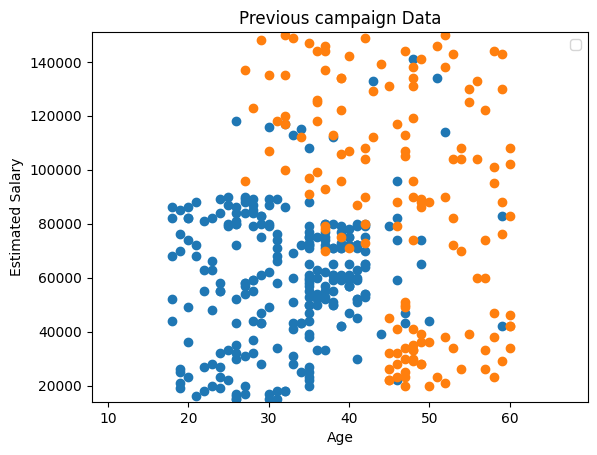

In [3]:
#Plot the Dataset
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel("ERROR")
X_set, y_set =X, Y
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-10,stop=X_set[:,0].max()+10,step=0.25),
                 np.arange(start=X_set[:,1].min()-1000,stop=X_set[:,1].max()+1000,step=0.25))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set ==j,1])
plt.title("Previous campaign Data")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend( )
plt.show( )

# Feature Scaling 

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(X)

# Training on Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_sc,Y)

LogisticRegression(random_state=0)

# Visualizing the Model resuts

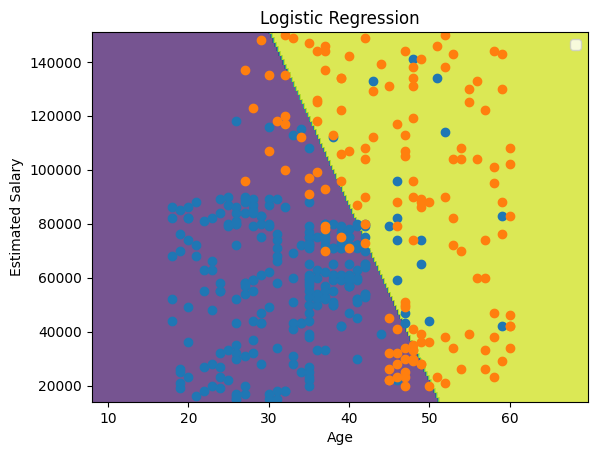

In [6]:
X_set, y_set =sc.inverse_transform(X_sc), Y
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-10,stop=X_set[:,0].max()+10,step=0.25),
                 np.arange(start=X_set[:,1].min()-1000,stop=X_set[:,1].max()+1000,step=0.25))
plt.contourf(X1,X2,classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),alpha=0.75)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set ==j,1])
plt.title("Logistic Regression")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend( )
plt.show( )

# Importing New Data

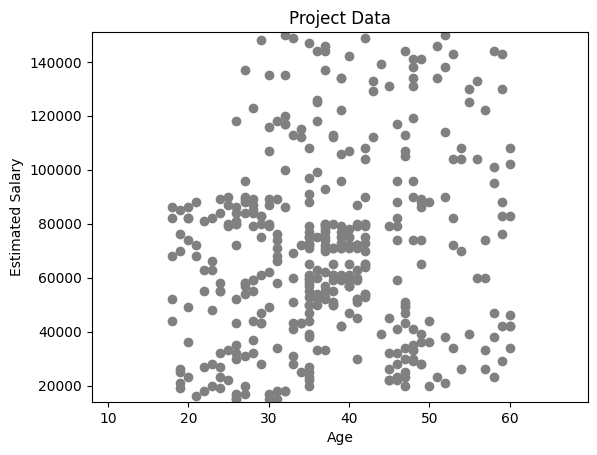

In [7]:
X_project =dataset.iloc[:,:-1]. values
X_set= X_project
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-10,stop=X_set[:,0].max()+10,step=0.25),
                 np.arange(start=X_set[:,1].min()-1000,stop=X_set[:,1].max()+1000,step=0.25))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(), X2.max())
plt.scatter(X_set[:,0],X_set[:,1],c='gray')
plt.title('Project Data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

# Apply Our Model to A New Project

In [8]:
X_project_sc=sc.transform(X_project)
y_project_pred=classifier.predict(X_project_sc)

# Visualize the predictions

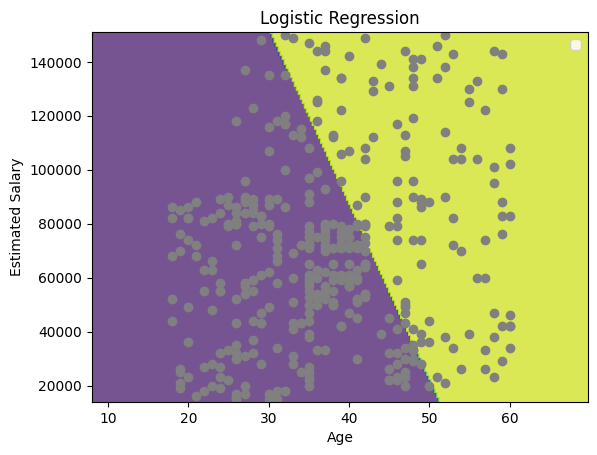

In [9]:
X_set, y_set =sc.inverse_transform(X_project_sc), y_project_pred
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-10,stop=X_set[:,0].max()+10,step=0.25),
                 np.arange(start=X_set[:,1].min()-1000,stop=X_set[:,1].max()+1000,step=0.25))
plt.contourf(X1,X2,classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),alpha=0.75)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(), X2.max())
plt.scatter(X_set[:,0],X_set[:,1],c='gray')
plt.title("Logistic Regression")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend( )
plt.show( )